In [ ]:
import tensorflow as tf
print(tf.__version__)

### Minimal example of tensorflow

In [1]:
# Import Relavent Libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
# Generate Random input data to train
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

print(generated_inputs.shape)

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

print(generated_targets.shape)

np.savez('TF_intro',inputs = generated_inputs, targets = generated_targets)

(1000, 2)
(1000, 1)


In [3]:
# Solving with TensorFlow
training_data = np.load('TF_intro.npz')

In [ ]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])


model.compile(optimizer='sgd',loss='mean_squared_error')


model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=1)

In [ ]:
# Extract the weights and biases
model.layers[0].get_weights()

In [ ]:
weights = model.layers[0].get_weights()[0]
weights

In [ ]:
biases = model.layers[0].get_weights()[1]
biases

In [ ]:
# Extract the outputs make Predictions
(model.predict_on_batch(training_data['inputs']))  #predict_on_batch use to make predictions

In [ ]:
model.predict_on_batch(training_data['inputs']).round(1)

In [ ]:
training_data['targets'].round(1)

In [ ]:
# Ploting the data
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs']))), np.squeeze(training_data['targets'])
plt.xlabel('outputs')
plt.ylabel('targets')

plt.show()

In [8]:
# Customizing the model
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                            bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                                )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


model.compile(optimizer=custom_optimizer,loss='mean_squared_error')


model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 20.0137
Epoch 2/100
1000/1000 [==============================] - 0s 74us/sample - loss: 1.2127
Epoch 3/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.5362
Epoch 4/100
1000/1000 [==============================] - 0s 65us/sample - loss: 0.3688
Epoch 5/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.3789
Epoch 6/100
1000/1000 [==============================] - 0s 80us/sample - loss: 0.4145
Epoch 7/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.3698
Epoch 8/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.3832
Epoch 9/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.4138
Epoch 10/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.3544
Epoch 11/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.3821
Epoch 12/100
1000/1

In [9]:
# Extract the weights and biases
model.layers[0].get_weights()

[array([[ 2.042555 ],
        [-2.9878237]], dtype=float32),
 array([5.022822], dtype=float32)]

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.042555 ],
       [-2.9878237]], dtype=float32)

In [11]:
biases = model.layers[0].get_weights()[1]
biases

array([5.022822], dtype=float32)

In [14]:
(model.predict_on_batch(training_data['inputs']))

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ -6.959274  ],
       [-29.01515   ],
       [ 38.933186  ],
       [ 40.69676   ],
       [ 31.157358  ],
       [-14.702539  ],
       [ 35.38538   ],
       [-18.748642  ],
       [ 35.034496  ],
       [ 11.170692  ],
       [ 33.473614  ],
       [  8.443163  ],
       [ 16.625076  ],
       [ -1.2740092 ],
       [ 23.242832  ],
       [ 38.581104  ],
       [ 25.027666  ],
       [  8.503657  ],
       [-19.631834  ],
       [ -0.5729728 ],
       [-19.530563  ],
       [-14.586206  ],
       [  0.46110582],
       [ 13.894369  ],
       [ 40.602695  ],
       [-31.753077  ],
       [  1.731688  ],
       [  3.3698559 ],
       [  6.708343  ],
       [-27.200525  ],
       [ 11.55859   ],
       [ 17.017952  ],
       [ -7.653129  ],
       [ -7.7494235 ],
       [ 13.743187  ],
       [ 30.125847  ],
       [-11.5133095 ],
       [ 34.852234  ],
       [ 23.212152  ],
       [ 22.196955  ],
       [ 13.977791  ],
      

In [13]:
training_data['targets'].round(1)

array([[ -5.9],
       [-28.9],
       [ 38.1],
       [ 40.5],
       [ 30.4],
       [-15.4],
       [ 34.4],
       [-17.8],
       [ 35. ],
       [ 11.9],
       [ 33. ],
       [  8.4],
       [ 17.1],
       [ -1.7],
       [ 23.3],
       [ 39.5],
       [ 25.4],
       [  8.2],
       [-19.6],
       [ -1. ],
       [-19.3],
       [-14.1],
       [ -0.6],
       [ 13.6],
       [ 39.4],
       [-31.8],
       [  2.8],
       [  3.1],
       [  6.2],
       [-27.4],
       [ 12.1],
       [ 18.1],
       [ -7.2],
       [ -7.7],
       [ 13.2],
       [ 30.2],
       [-12.4],
       [ 33.5],
       [ 24. ],
       [ 22.4],
       [ 14.5],
       [ 14.5],
       [-13. ],
       [ 18.2],
       [-14.8],
       [-18.4],
       [ 16.9],
       [ 39.2],
       [ 37.4],
       [ 17.3],
       [ 23.6],
       [ -1.2],
       [ 27.5],
       [ 14.7],
       [ -3.5],
       [-16. ],
       [ 17.7],
       [ 23.7],
       [ 46.3],
       [  3.3],
       [-36.8],
       [ 43.5],
       [

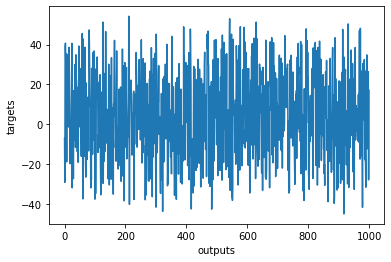

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs']))), np.squeeze(training_data['targets'])
plt.xlabel('outputs')
plt.ylabel('targets')


plt.show()